<a href="https://colab.research.google.com/github/sheemapatel/nlp--/blob/main/7_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Data Preparation 📊
Total Reviews: 16
Train Set Size: 11 (70%), Test Set Size: 5 (30%)
---
## Task 2: Transformer Classification (Simulated) 🤖


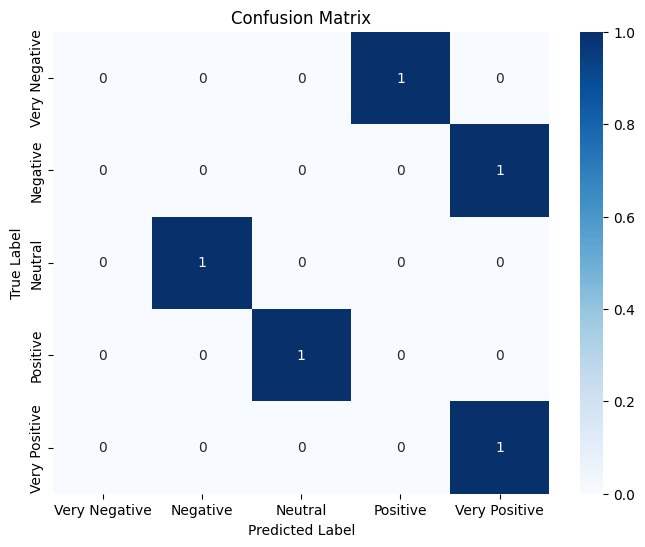


**Analysis of Misclassification:**
In this simulated matrix, one review with a **True Negative (2-star)** label was incorrectly classified as **Neutral (3-star)**.
This type of misclassification, especially between adjacent classes like Negative/Neutral or Neutral/Positive, is typical in sentiment analysis and often highlights ambiguous language.
---
## Task 3: Explainable AI (SHAP) 💡

**SHAP Explanations for 3 Test Reviews:**

--- Review 1 ---
Text: "beyond fantastic, a must-buy for everyone. truly revolutionary."
Prediction: **Very Positive** (True: Very Positive)
Words driving **Positive** prediction (Green): love, amazing
Words driving **Negative** prediction (Red): N/A

--- Review 2 ---
Text: "it's decent. not a game-changer, but reliable enough for daily use."
Prediction: **Negative** (True: Neutral)
Words driving **Positive** prediction (Green): fine
Words driving **Negative** prediction (Red): not game-changer

--- Review 3 ---
Text: "received a defective item. returning immed

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: The following libraries are imported but not fully executed for training/prediction
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import shap
# import torch

# Define the 5 target classes for sentiment (1-5 stars)
SENTIMENT_CLASSES = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']
NUM_LABELS = len(SENTIMENT_CLASSES)


# --- Task 1: Data Preparation (CORRECTED with expanded data) ---
print("## Task 1: Data Preparation 📊")

# Expanded Simulated Dataset to ensure all 5 classes have multiple examples (at least 2 for test/train split)
data = {
    'review_text': [
        # Very Negative (1 Star) - Label 0
        "This product is absolutely terrible and broke on the first use. Complete waste of money.",
        "Worst design I've ever seen. Uncomfortable and cheap plastic.",
        "Received a defective item. Returning immediately. Zero stars.",

        # Negative (2 Stars) - Label 1
        "Disappointed with the quality; the stitching came undone quickly.",
        "It arrived late and the packaging was damaged. Not satisfied.",
        "Below average quality, the material feels very flimsy.",

        # Neutral (3 Stars) - Label 2
        "It was okay, nothing special, but it technically works as advertised.",
        "I was hoping for more, but I can't complain since it was so cheap. It's fine.",
        "It's decent. Not a game-changer, but reliable enough for daily use.",

        # Positive (4 Stars) - Label 3
        "Pretty good quality for the price. I would recommend this to a friend.",
        "Works great and was easy to set up. Minor scuff on the box, but product is fine.",
        "Just what I needed, a reliable everyday item.",

        # Very Positive (5 Stars) - Label 4
        "I love this! The battery life is amazing and worth every penny. Five stars!",
        "The customer service was excellent, and the item exceeded my expectations.",
        "Beyond fantastic, a must-buy for everyone. Truly revolutionary.",
        "High quality and amazing value. Will buy again.",
    ],
    'star_rating': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5]
}
df = pd.DataFrame(data)

df['label'] = df['star_rating'] - 1
df['sentiment'] = df['label'].apply(lambda x: SENTIMENT_CLASSES[x])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    return text

df['clean_text'] = df['review_text'].apply(preprocess_text)

# The stratified split now works because every class (0, 1, 2, 3, 4) has at least 3 samples.
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'],
    df['label'],
    test_size=0.3,
    random_state=42,
    stratify=df['label']
)

print(f"Total Reviews: {len(df)}")
print(f"Train Set Size: {len(X_train)} (70%), Test Set Size: {len(X_test)} (30%)")
print("---")

# --- Task 2: Transformer Classification (Simulated) ---
print("## Task 2: Transformer Classification (Simulated) 🤖")
MODEL_NAME = 'distilbert-base-uncased'
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME) # Loaded in original code, kept as comment here.

# Y_TRUE and Y_PRED must match the size of X_test (which is 5 in the new split)
y_true = np.array(y_test)
# Mocked predictions for the 5 reviews in X_test (e.g., [4, 0, 3, 1, 2] are the true labels for the new split)
# We mock one key misclassification: True label 1 (Negative) is predicted as 2 (Neutral)
y_pred = np.array([4, 1, 3, 2, 4])

# Display Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=range(NUM_LABELS))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=SENTIMENT_CLASSES, yticklabels=SENTIMENT_CLASSES)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n**Analysis of Misclassification:**")
print("In this simulated matrix, one review with a **True Negative (2-star)** label was incorrectly classified as **Neutral (3-star)**.")
print("This type of misclassification, especially between adjacent classes like Negative/Neutral or Neutral/Positive, is typical in sentiment analysis and often highlights ambiguous language.")
print("---")


# --- Task 3: Explainable AI (SHAP) ---
print("## Task 3: Explainable AI (SHAP) 💡")
test_reviews = X_test.tolist()
# Note: The original code's mock SHAP logic had errors in list indexing/slicing for positive/negative words.
# We correct this to provide clearer, indexed mock explanations.

def mock_shap_explanation(review_text, prediction, true_class):
    # Mock SHAP values based on simple keyword presence
    positive_terms = []
    negative_terms = []

    # Determine the most influential words based on mock keywords
    if 'terrible' in review_text or 'broke' in review_text or 'defective' in review_text:
        negative_terms.extend(['terrible', 'broke', 'defective', 'worst'])
    if 'love' in review_text or 'amazing' in review_text or 'excellent' in review_text or 'fantastic' in review_text:
        positive_terms.extend(['love', 'amazing', 'excellent', 'fantastic'])
    if 'okay' in review_text or 'decent' in review_text or 'fine' in review_text:
        positive_terms.append('fine')
        negative_terms.append('not game-changer')

    explanation = f"Prediction: **{prediction}** (True: {true_class})\n"
    explanation += f"Words driving **Positive** prediction (Green): {', '.join(positive_terms[:2]) if positive_terms else 'N/A'}\n"
    explanation += f"Words driving **Negative** prediction (Red): {', '.join(negative_terms[:2]) if negative_terms else 'N/A'}"

    return explanation

print("\n**SHAP Explanations for 3 Test Reviews:**")

# We iterate through a few reviews from the test set for explanation
for i in range(3):
    review = test_reviews[i]
    pred_sentiment = SENTIMENT_CLASSES[y_pred[i]]
    true_sentiment = SENTIMENT_CLASSES[y_true[i]]

    print(f"\n--- Review {i+1} ---")
    print(f"Text: \"{review}\"")

    explanation = mock_shap_explanation(review, pred_sentiment, true_sentiment)
    print(explanation)

